<a href="https://colab.research.google.com/github/sisco1113/convolutional-neural-network-deep-learning-AI-algorithm/blob/main/CNN_(Deep_Learning_AI_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

# You probably don’t need this part, (unless your ‘Tensorflow’ uses ‘theano’ as the backend engine)
# but just in case.
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#show shape of X_train and X_test
print ("X_train shape: ",X_train.shape)
print ("X_test shape: ",X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


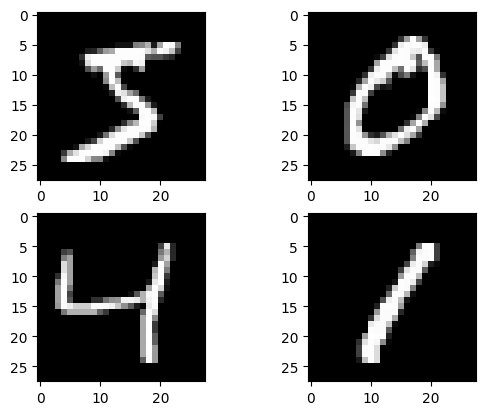

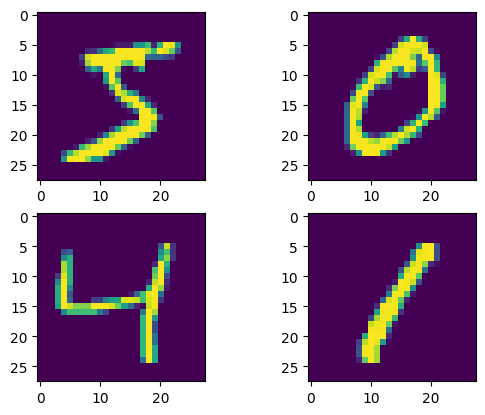

In [2]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#Show the pictures
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[2])
plt.subplot(224)
plt.imshow(X_train[3])

plt.show()

In [3]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

num_classes = 10

# one hot encode outputs
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
# add batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

#add a few more convolutional layers and pooling layers
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# add dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# add dropout
model.add(Dense(num_classes, activation='softmax'))

#show model_summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 256)         0         
 g2D)                                                   

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# you may change epochs and batch_size for performance
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
